In [103]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
import pandas as pd
import warnings

In [66]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [67]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [68]:
dirpath = '../assignment-2-ksr-0011/Data/SMAI-Dataset-release/IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


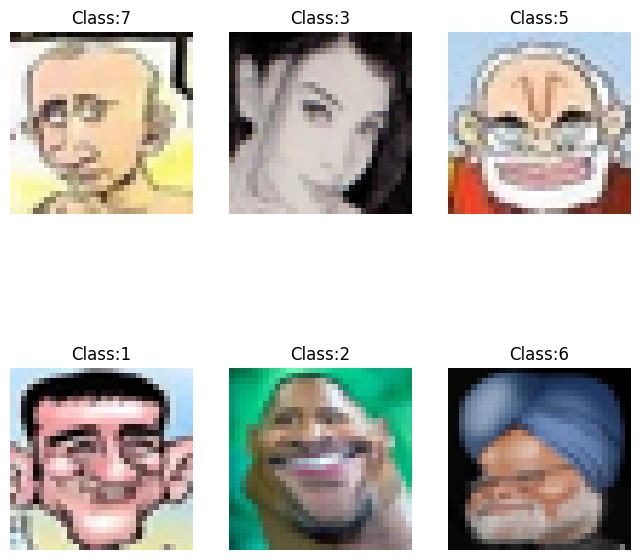

In [69]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

# IIIT-CFW Dataset


In [70]:
X.shape

(672, 32, 32, 3)

In [71]:
# Reshaping data
X_reshaped = X.reshape(N,H*W*C)
X_reshaped.shape

(672, 3072)

In [72]:
# Standardizing the data first
mean = X_reshaped.mean()
std = X_reshaped.std()
X_standardized = (X_reshaped-mean)/std
print(f"The MEAN of standardized data is {X_standardized.mean()} and STD is {X_standardized.std()}")

The MEAN of standardized data is -6.167905692361981e-17 and STD is 1.0


In [73]:
# Calculating the covariange matrix
C = np.dot(X_standardized.T, X_standardized)

# Performing SVD
E,S,ET = np.linalg.svd(C)

# Here ET will be our PCA projection matrix
ET.shape


(3072, 3072)

Text(0.5, 1.0, 'Cumulative Explained Variance vs Number of Principal Components')

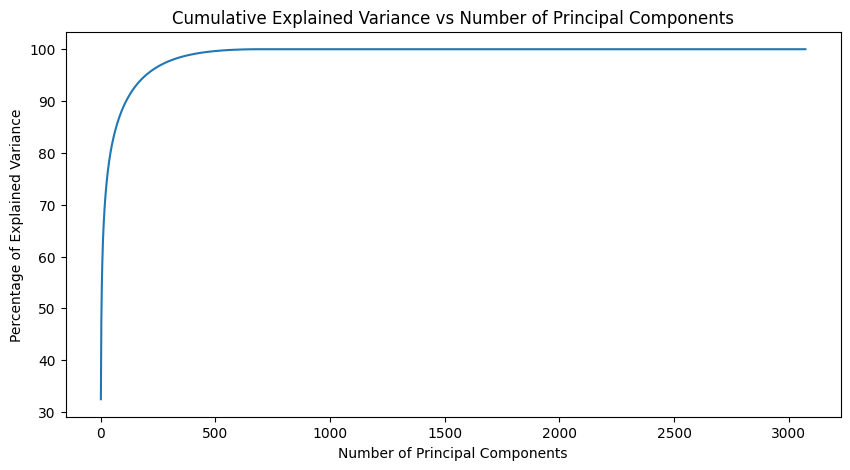

In [74]:
n_pc = np.arange(1,X_standardized.shape[1]+1)
total_var = np.sum(S)
per_cum_expl_var = (np.cumsum(S)/total_var)*100

plt.figure(figsize=(10,5))
plt.plot(n_pc,per_cum_expl_var)
plt.xlabel('Number of Principal Components')
plt.ylabel('Percentage of Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [76]:
# Before performing PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

knn = KNeighborsClassifier(7)
knn.fit(X_train.reshape(X_train.shape[0],-1),y_train)
y_pred = knn.predict(X_test.reshape(X_test.shape[0],-1))

print("Before performing PCA: \n")
print(f"Accuracy: {accuracy_score(y_test,y_pred)}\n")
print(f"Precision: {precision_score(y_test,y_pred,average='macro')}\n")

Before performing PCA: 

Accuracy: 0.3851851851851852

Precision: 0.5023026315789474



In [77]:
# After performing PCA
acc_vals = []
prec_vals = []
num_PC = [1, 2, 5, 10, 20, 64, 128, 512, 1024, 2048, 3072]
 
for i in num_PC:
    ET_reduced = ET[:i,:]
    X_new = np.dot(X_standardized,ET_reduced.T)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)

    knn = KNeighborsClassifier(7)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)

    acc_vals.append(accuracy_score(y_test,y_pred))
    prec_vals.append(precision_score(y_test,y_pred,average='macro'))
    print(f"After performing PCA with {i} components: \n")
    print(f"Accuracy: {accuracy_score(y_test,y_pred)}\n")
    print(f"Precision: {precision_score(y_test,y_pred,average='macro')}\n")


After performing PCA with 1 components: 

Accuracy: 0.14814814814814814

Precision: 0.17862375894096297

After performing PCA with 2 components: 

Accuracy: 0.25925925925925924

Precision: 0.22736111111111107

After performing PCA with 5 components: 

Accuracy: 0.3925925925925926

Precision: 0.3919757326007326

After performing PCA with 10 components: 

Accuracy: 0.45185185185185184

Precision: 0.47919284759358294

After performing PCA with 20 components: 

Accuracy: 0.5185185185185185

Precision: 0.5853166973691271

After performing PCA with 64 components: 

Accuracy: 0.4666666666666667

Precision: 0.5259113819946584

After performing PCA with 128 components: 

Accuracy: 0.43703703703703706

Precision: 0.4980587121212121

After performing PCA with 512 components: 

Accuracy: 0.3851851851851852

Precision: 0.5105261314277707

After performing PCA with 1024 components: 

Accuracy: 0.3851851851851852

Precision: 0.5023026315789474

After performing PCA with 2048 components: 

Accuracy: 0

Text(0.5, 1.0, 'Precision vs Number of Principal Components')

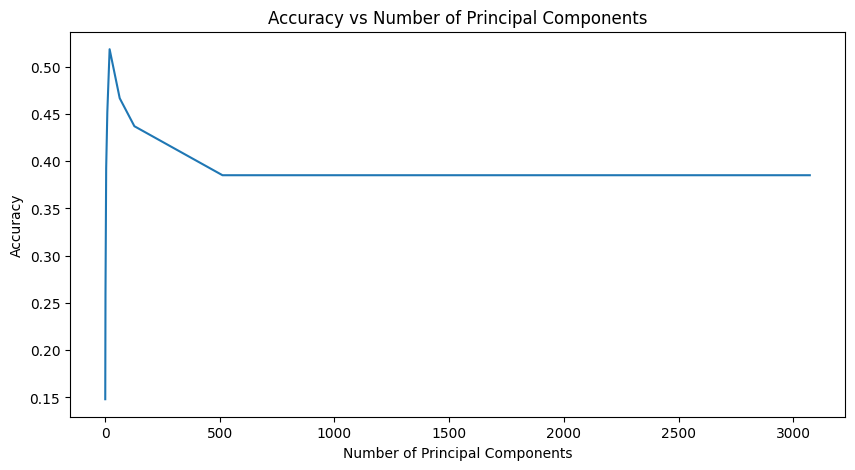

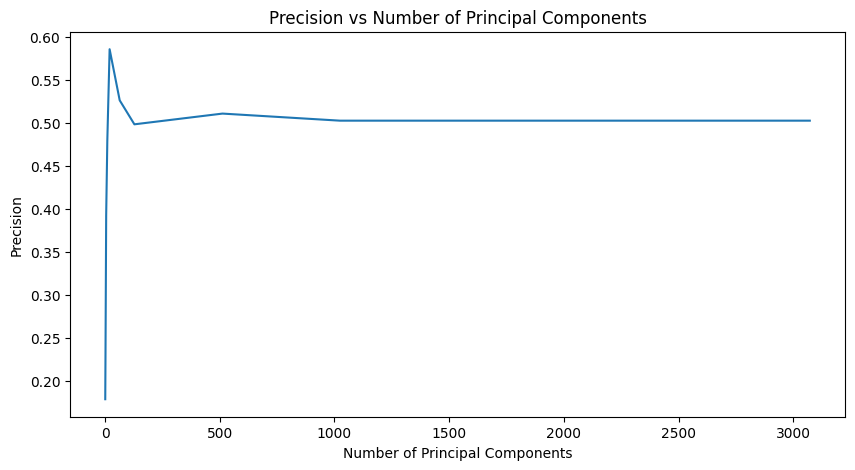

In [78]:
plt.figure(figsize=(10,5))
plt.plot(num_PC,acc_vals)
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Principal Components')
plt.figure(figsize=(10,5))
plt.plot(num_PC,prec_vals)
plt.xlabel('Number of Principal Components')
plt.ylabel('Precision')
plt.title('Precision vs Number of Principal Components')


# For assignment-1 pictionary dataset

In [79]:
f = open("../assignment-2-ksr-0011/Data/data.npy", "rb")
data = np.load(f, allow_pickle=True)
data.shape


(1500, 5)

In [80]:
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4
0,9f894201-9d0d-4f75-853b-595c0c1bd661,"[[-0.001002429, 0.047839083, -0.0046581626, 0....","[[0.31094703, 0.20213455, -0.16519593, -0.0530...",sleep,33.144312
1,d2b4d879-0345-4df1-a978-eb7f9e8b89f1,"[[-0.013190677, 0.08283211, 0.006474074, 0.001...","[[-0.07832227, -0.07557866, -0.05214904, -0.32...",oven,98.512848
2,aaf0c209-f3a7-4c91-9a09-bc1e30400c4c,"[[-0.010499587, 0.047467805, -0.019303396, -0....","[[0.31455985, -0.024428558, 0.33139282, 0.2197...",chair,15.449425
3,5ae313c7-9934-456c-9685-36ef20b712fd,"[[-0.023966337, 0.024375185, -0.0009961016, -0...","[[0.113364324, -0.23683439, 0.34781978, -0.427...",igloo,43.358541
4,b58bbb2c-461f-4805-856e-cba323f97e8c,"[[-0.018555297, 0.050565578, -0.008821793, 0.0...","[[0.22332864, -0.28626534, -0.037617087, -0.17...",fish,14.454734


In [92]:
vit_encodings = data[:,2]
labels = data[:,3]
vit_encodings.shape
print(vit_encodings.shape)
# The shape comes out to be (1500,) but each encoding of vit is of shape (1,512)
# So we need to reshape the data
vit_encodings = np.array(vit_encodings.tolist())
print(vit_encodings.shape)
vit_reshaped = vit_encodings.reshape(1500,512)
print(vit_reshaped.shape)



(1500,)
(1500, 1, 512)
(1500, 512)


In [114]:
# Covariance matrix
C_vit = np.dot(vit_reshaped.T, vit_reshaped)

# Performing SVD
E_vit,S_vit,ET_vit = np.linalg.svd(C_vit)

# ET_vit will be our PCA projection matrix
ET_vit.shape

(512, 512)

In [104]:
# Before performing PCA

X_train, X_test, y_train, y_test = train_test_split(vit_reshaped, labels, test_size = 0.2, random_state = 42)
knn = KNeighborsClassifier(7)
knn.fit(X_train.reshape(X_train.shape[0],-1),y_train)
y_pred = knn.predict(X_test.reshape(X_test.shape[0],-1))
warnings.filterwarnings("ignore")

print("Before performing PCA: \n")
print(f"Accuracy: {accuracy_score(y_test,y_pred)}\n")
print(f"Precision: {precision_score(y_test,y_pred,average='macro')}\n")
print(f"Recall: {recall_score(y_test,y_pred,average='macro')}\n")
print(f"F1 Score: {f1_score(y_test,y_pred,average='macro')}")

Before performing PCA: 

Accuracy: 0.22

Precision: 0.13808493094207377

Recall: 0.15024221809936095

F1 Score: 0.13103572431303523


In [107]:
# After performing PCA
acc_vals = []
prec_vals = []
recall_vals = []
f1_vals = []
num_PC = [1, 2, 5, 10, 20, 64, 128, 256, 512]
 
for i in num_PC:
    ET_vit_reduced = ET_vit[:i,:]
    X_vit_new = np.dot(vit_reshaped,ET_vit_reduced.T)
    X_train, X_test, y_train, y_test = train_test_split(X_vit_new, labels, test_size = 0.2, random_state = 42)

    knn = KNeighborsClassifier(7)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)

    acc_vals.append(accuracy_score(y_test,y_pred))
    prec_vals.append(precision_score(y_test,y_pred,average='macro'))
    recall_vals.append(recall_score(y_test,y_pred,average='macro'))
    f1_vals.append(f1_score(y_test,y_pred,average='macro'))
    print(f"After performing PCA with {i} components: \n")
    print(f"Accuracy: {accuracy_score(y_test,y_pred)}\n")
    print(f"Precision: {precision_score(y_test,y_pred,average='macro')}\n")
    print(f"Recall: {recall_score(y_test, y_pred, average='macro')}\n")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='macro')}\n")



After performing PCA with 1 components: 

Accuracy: 0.013333333333333334

Precision: 0.0037348272642390287

Recall: 0.006100217864923747

F1 Score: 0.004200241145545583

After performing PCA with 2 components: 

Accuracy: 0.016666666666666666

Precision: 0.008727477477477477

Recall: 0.006783569283569283

F1 Score: 0.00651910026910027

After performing PCA with 5 components: 

Accuracy: 0.043333333333333335

Precision: 0.026451612903225803

Recall: 0.023154121863799282

F1 Score: 0.021508276669566992

After performing PCA with 10 components: 

Accuracy: 0.11

Precision: 0.08267308753885937

Recall: 0.08523489932885905

F1 Score: 0.06828786426101863

After performing PCA with 20 components: 

Accuracy: 0.17

Precision: 0.11837531155712974

Recall: 0.10821480107194392

F1 Score: 0.09935342435342435

After performing PCA with 64 components: 

Accuracy: 0.22

Precision: 0.1418052992758875

Recall: 0.15708994708994709

F1 Score: 0.13290762877759782

After performing PCA with 128 components:

Text(0.5, 1.0, 'F1 Score vs Number of Principal Components')

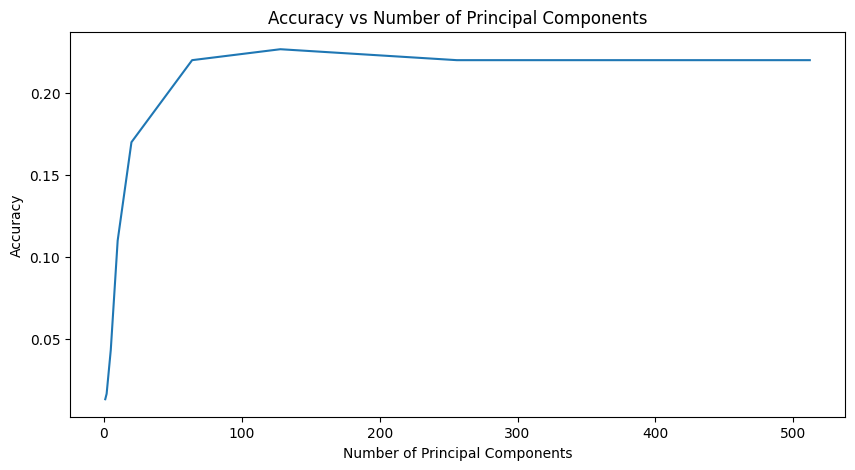

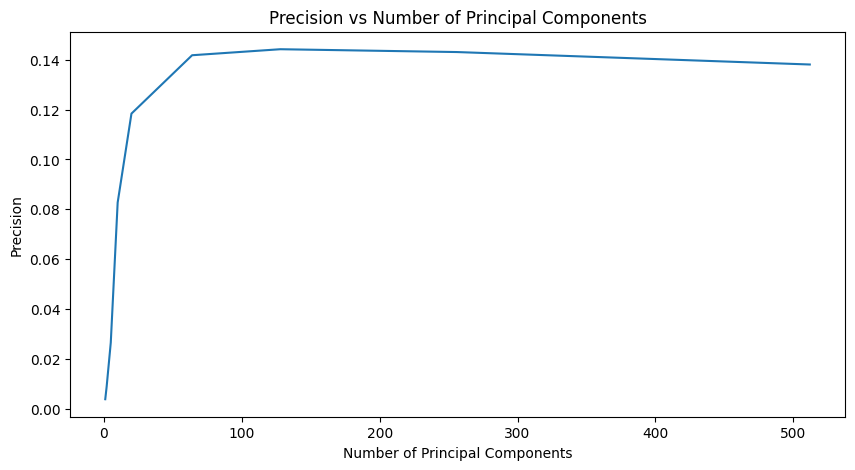

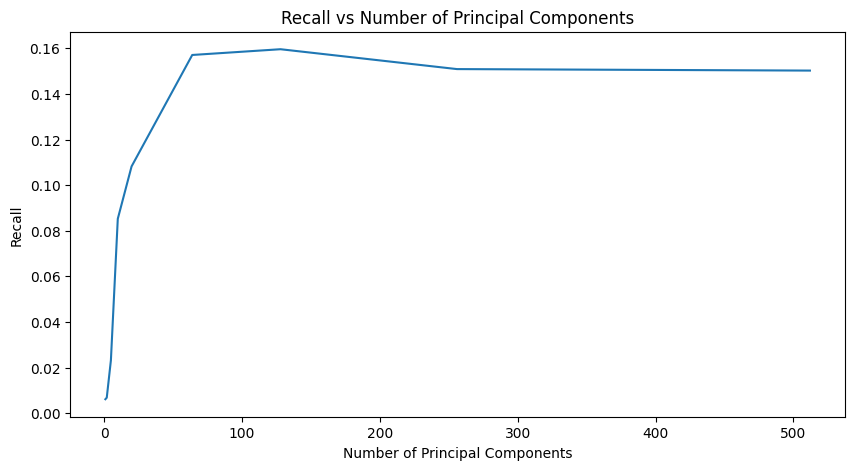

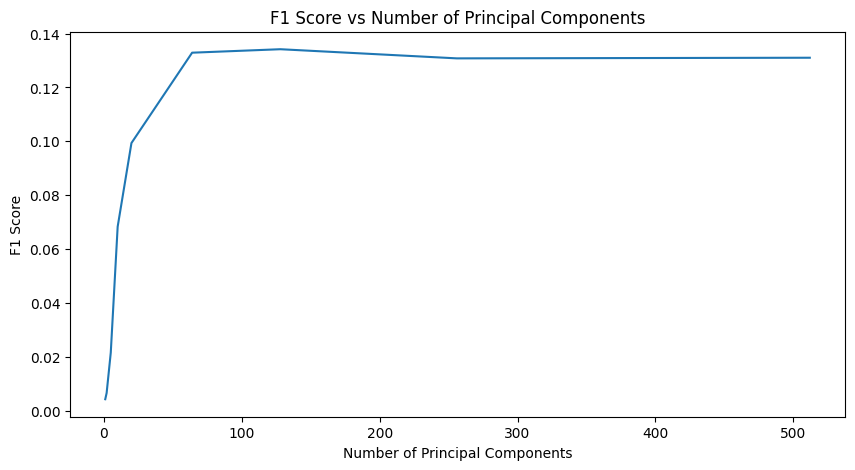

In [108]:
plt.figure(figsize=(10,5))
plt.plot(num_PC,acc_vals)
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Principal Components')
plt.figure(figsize=(10,5))
plt.plot(num_PC,prec_vals)
plt.xlabel('Number of Principal Components')
plt.ylabel('Precision')
plt.title('Precision vs Number of Principal Components')
plt.figure(figsize=(10,5))
plt.plot(num_PC,recall_vals)
plt.xlabel('Number of Principal Components')
plt.ylabel('Recall')
plt.title('Recall vs Number of Principal Components')
plt.figure(figsize=(10,5))
plt.plot(num_PC,f1_vals)
plt.xlabel('Number of Principal Components')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Number of Principal Components')


We observe that on performing PCA, when we take only first few PCA axes, we get better accuracy, recall, precision and other metrics as compared to taking full data.
This shows that most of the relevant information is stored in the first few PCA axes and that further axes contain noisy data.

# Drawer-Guesser Pictionary

In [111]:
f1 = "../Data/assignment-2-ksr-0011/smai_assignment_pictionary/drawer_attributes.csv"
f2 = "../Date/assignment-2-ksr-0011/smai_assignment_pictionary/guesser_attributes.csv"
drawer_data = pd.read_csv(f1)
guesser_data = pd.read_csv(f2)
drawer_data.head()

,d_drawer,d_area_median,d_stroke_freq_median,d_rangestroketime_median,d_firststroketime_median,d_laststroketime_median,d_pcgamestup,d_pcgamestdown,d_pcgameserasehighlight
0,10,0.000000,0.000000,0.000,0.000,0.000,0.00,0.0,0.000000
1,36,82306.749763,0.578802,21.660,3.512,26.815,0.00,0.0,0.777778
2,14,60929.328432,0.239168,25.087,1.368,26.455,1.00,1.0,1.000000
3,26,119037.637976,0.402533,54.162,2.459,56.621,0.75,0.5,1.000000
4,40,0.000000,0.000000,0.000,0.000,0.000,0.00,0.0,0.000000


In [112]:
guesser_data.head()

,g_guesser,g_noofmessage_median,g_firstmessagetime_median,g_lastmessagetime_median,g_rangemessagetime_median,g_pcgamesconfusion,g_entropy
0,10,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,36,1.0,25.367172,39.041594,0.000000,0.0,0.000000
2,14,2.0,12.988740,51.351317,38.362577,1.0,0.693147
3,26,3.5,20.622346,64.718058,44.095712,0.0,1.242453
4,40,3.0,30.339558,78.943003,48.603445,0.0,1.098612


In [113]:
# Removing Drawer/Guesser ID from data (the first column)
draw_np_data = np.array(drawer_data.iloc[:, 1:])
guess_np_data = np.array(guesser_data.iloc[:, 1:])

### PCA on drawers data

In [117]:
draw_reshaped = draw_np_data.T 

# Covariance matrix
C_draw = np.dot(draw_reshaped,draw_reshaped.T)
E_draw, S_draw, ET_draw = np.linalg.svd(C_draw)

# ET_draw will be our PCA projection matrix
ET_draw.shape


(8, 8)

In [123]:
n = np.array([1,2,3,4,5,6,7,8])
def feat_plot(X, num):
    plt.figure()
    plt.plot(n, abs(X))
    plt.xlabel('Feature(Attributes of Drawer)')
    plt.ylabel('Coefficient(Contribution)')
    plt.title(f'For PCA {num}')

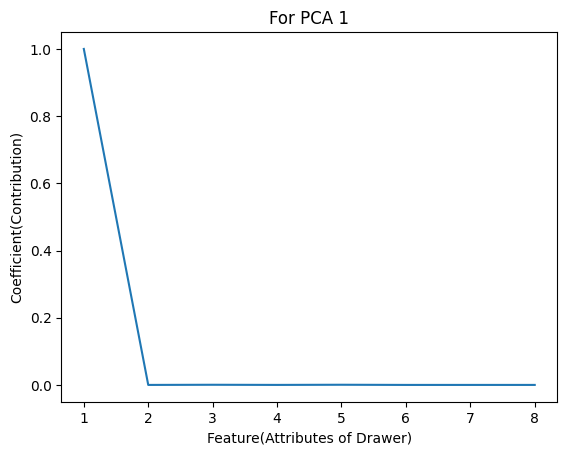

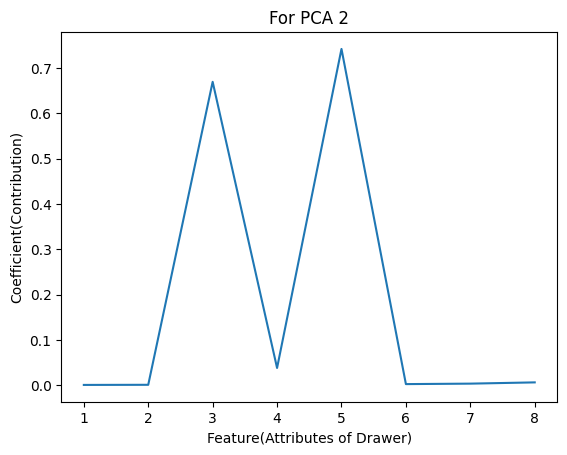

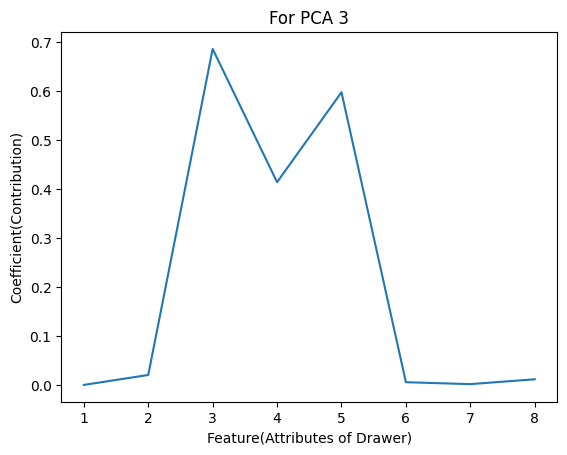

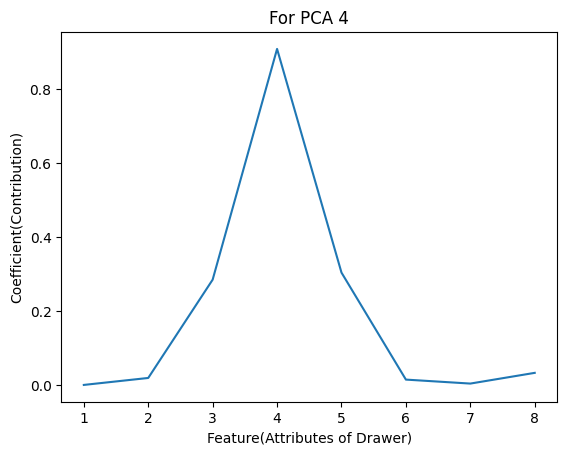

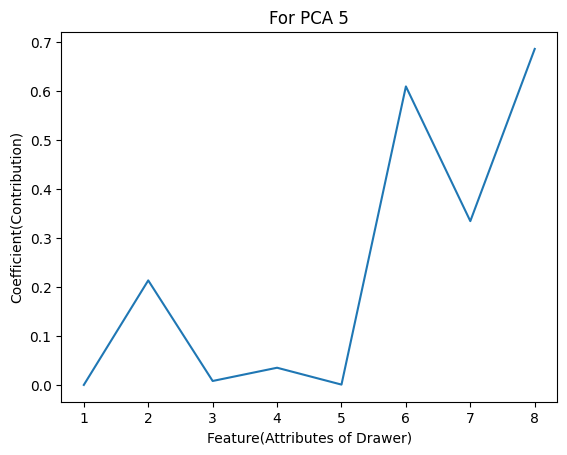

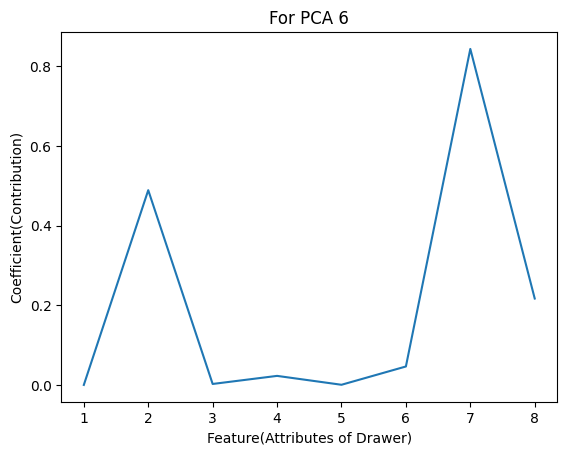

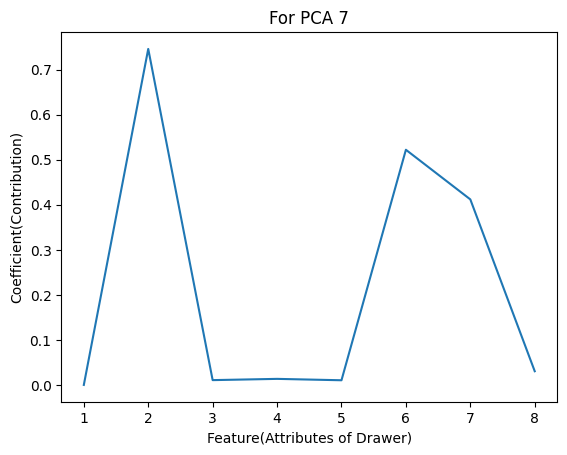

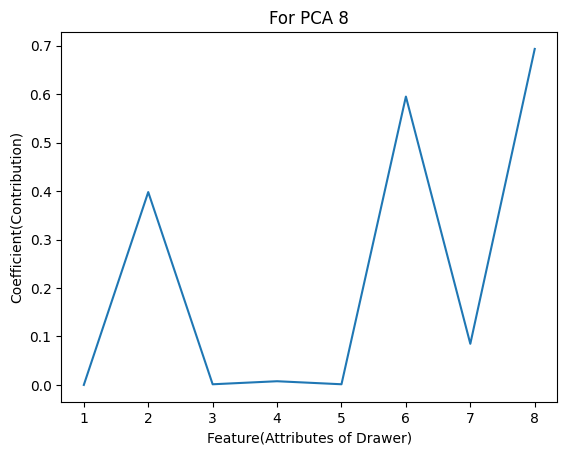

In [124]:
# Plots of coefficients of different features with respect to different PCAs
feat_plot(ET_draw[0], 1)
feat_plot(ET_draw[1], 2)
feat_plot(ET_draw[2], 3)
feat_plot(ET_draw[3], 4)
feat_plot(ET_draw[4], 5)
feat_plot(ET_draw[5], 6)
feat_plot(ET_draw[6], 7)
feat_plot(ET_draw[7], 8)



These plots show the contribution of each attribute to a given PCA.
